In [1]:
# import required libraries
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split #splits data for training and testing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report, confusion_matrix

In [2]:
# File path
file_path = 'dataset/seg_train'

In [3]:
# Load class names
name_class = os.listdir(file_path)
name_class

['forest', 'glacier', 'mountain', 'sea', 'street']

In [4]:
# Get filepaths
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths[-6:-1]

['dataset/seg_train\\street\\9959.jpg',
 'dataset/seg_train\\street\\9961.jpg',
 'dataset/seg_train\\street\\9967.jpg',
 'dataset/seg_train\\street\\9978.jpg',
 'dataset/seg_train\\street\\9989.jpg']

In [6]:
# Extract labels from file paths
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',
 'forest',

In [7]:
# Create dataframe
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,dataset/seg_train\sea\14949.jpg,sea
1,dataset/seg_train\street\2703.jpg,street
2,dataset/seg_train\street\15327.jpg,street
3,dataset/seg_train\mountain\18159.jpg,mountain
4,dataset/seg_train\mountain\13019.jpg,mountain


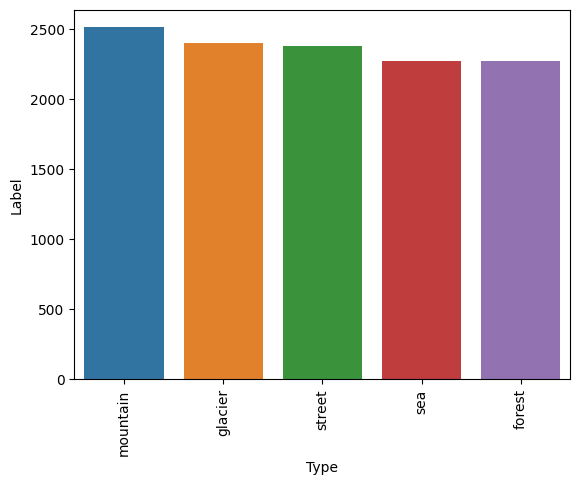

In [8]:
# Plot label counts
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [9]:
# Split data
train, test = train_test_split(data, test_size=0.20, random_state=42)

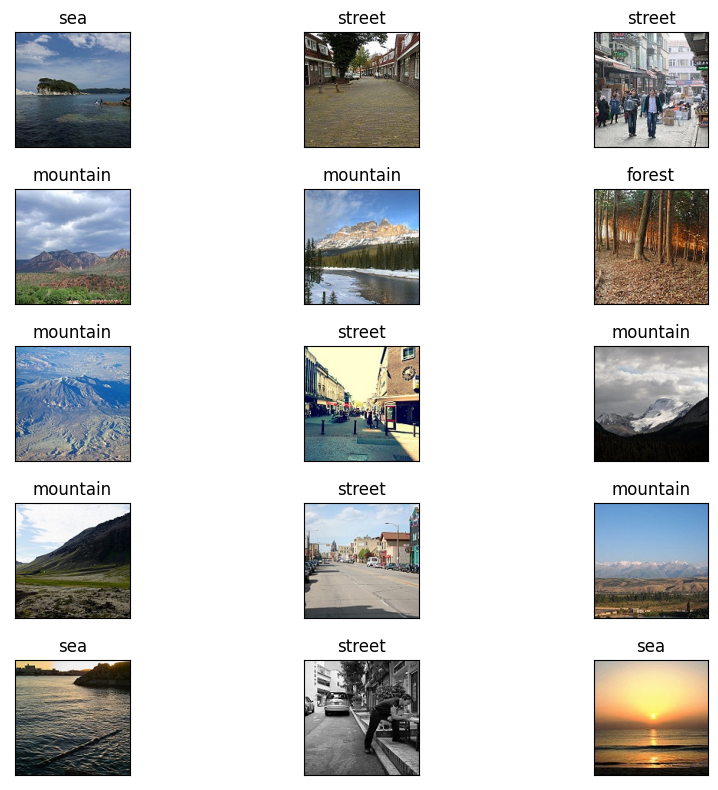

In [10]:
# Display sample images
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [11]:
# Data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 9474 validated image filenames belonging to 5 classes.
Found 2369 validated image filenames belonging to 5 classes.
Found 2369 validated image filenames belonging to 5 classes.


In [13]:
# Load pre-trained ResNet50 model
pretrained_model = ResNet50(
    input_shape=(256,256, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [14]:
# Build model
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [15]:
# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Callbacks
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [17]:
# Train model
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10
297/297 [==============================] - 948s 3s/step - loss: 0.2393 - accuracy: 0.9131 - val_loss: 0.1832 - val_accuracy: 0.9329
Epoch 2/10
297/297 [==============================] - 911s 3s/step - loss: 0.1481 - accuracy: 0.9422 - val_loss: 0.1911 - val_accuracy: 0.9333
Epoch 3/10
297/297 [==============================] - 925s 3s/step - loss: 0.1182 - accuracy: 0.9565 - val_loss: 0.1710 - val_accuracy: 0.9443
Epoch 4/10
297/297 [==============================] - 968s 3s/step - loss: 0.1015 - accuracy: 0.9606 - val_loss: 0.1932 - val_accuracy: 0.9388
Epoch 5/10
297/297 [==============================] - 875s 3s/step - loss: 0.0904 - accuracy: 0.9651 - val_loss: 0.2199 - val_accuracy: 0.9316
Epoch 6/10
297/297 [==============================] - 911s 3s/step - loss: 0.0680 - accuracy: 0.9755 - val_loss: 0.1859 - val_accuracy: 0.9396
Epoch 7/10
297/297 [==============================] - 933s 3s/step - loss: 0.0557 - accuracy: 0.9779 - val_loss: 0.2334 - val_accuracy: 0.9341

In [18]:
# save the trained model
model.save("scene_detection.h5")  

C:\Users\SUMIT\anaconda3\envs\scene_recognition\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


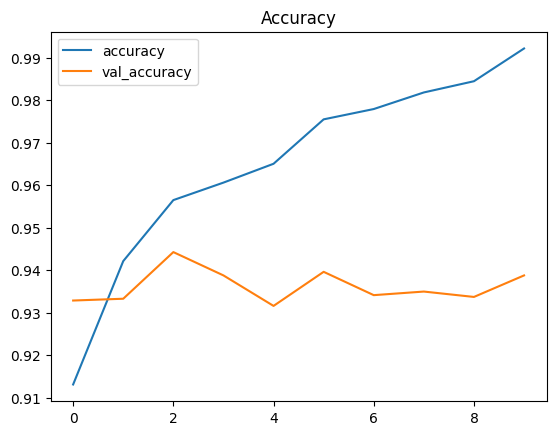

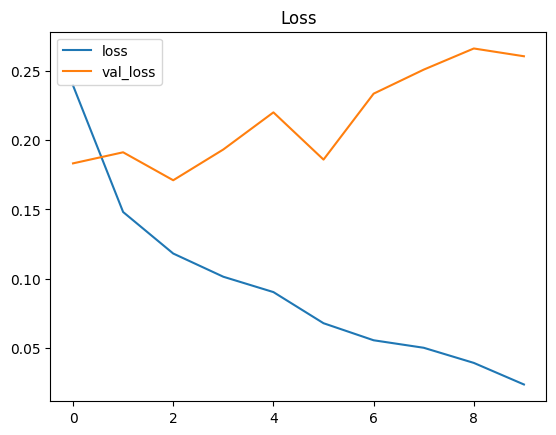

In [19]:
# Plot training accuracy and loss
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [20]:
# Evaluate model on test set
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.26033
Test Accuracy: 93.88%


In [21]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [22]:
# Classification report
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      forest       0.99      1.00      0.99       445
     glacier       0.90      0.85      0.88       516
    mountain       0.87      0.89      0.88       491
         sea       0.95      0.98      0.97       446
      street       0.99      0.99      0.99       471

    accuracy                           0.94      2369
   macro avg       0.94      0.94      0.94      2369
weighted avg       0.94      0.94      0.94      2369



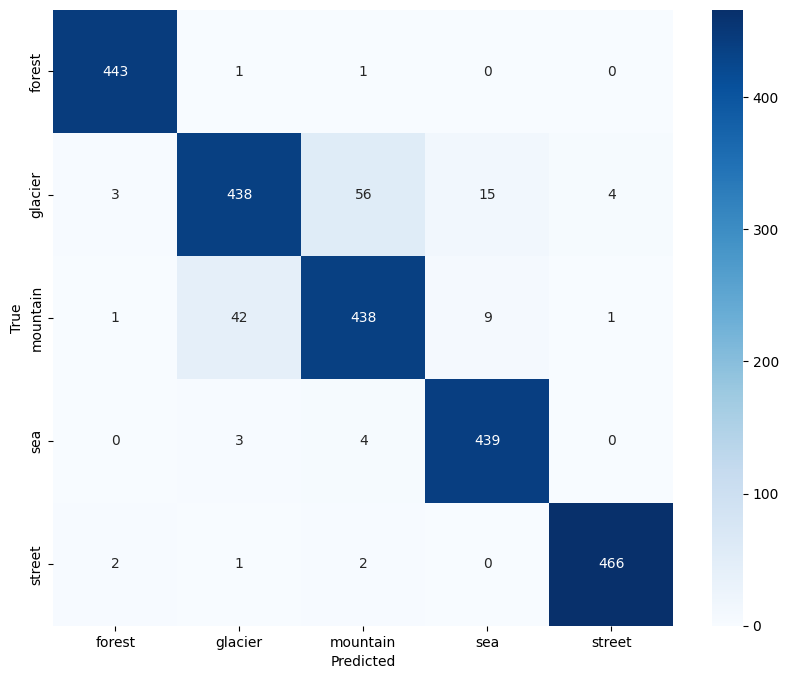

In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred, labels=list(labels.values()))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

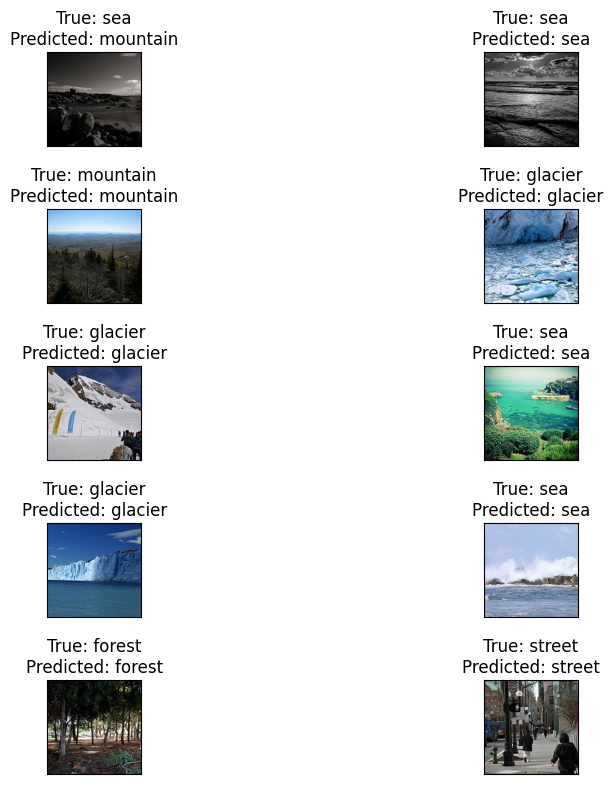

In [24]:
# Display sample predictions
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [25]:
# Predict a single image
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '0.jpg'

img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))


[[ 0  0 89  9  0]]
